## Gaussian Transformation

Some machine learning models like **linear and logistic regression** assume that the **variables are normally distributed**. If a variable is **not normally distributed**, it is often  possible to find a **mathematical transformation to normalise its distribution**.

The **most commonly used methods** to transform variables are: **Logarithmic transformation**: np.log(X), **Reciprocal transformation**: 1 / X, **Square root transformation:** X**(1/2), **Exponential transformation** (any exponent), **Box-Cox transformation:** and **Yeo-Johnson transformation* [here](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

Briefly, the **Box-Cox transformation** is an adaptation of the **exponential transformation, scanning through various exponents**, and it already represents the untransformed variable, as well as the log transformed, reciprocal, square and cube root transformed, as the lambda varies across the range of -5 to 5 (see formula or accompanying video, to understand this better). So by doing Box-Cox transformation, in a way, we are evaluating all the other transformations and choosing the best one. Box-Cox can only be applied to positive variables.

**Yeo-Johnson** is a **modification of the Box-Cox transformation** so that it can be applied as well to non-positive variables!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_excel('HousingPrices.xls')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**Explore the distribution of the numerical variables!**

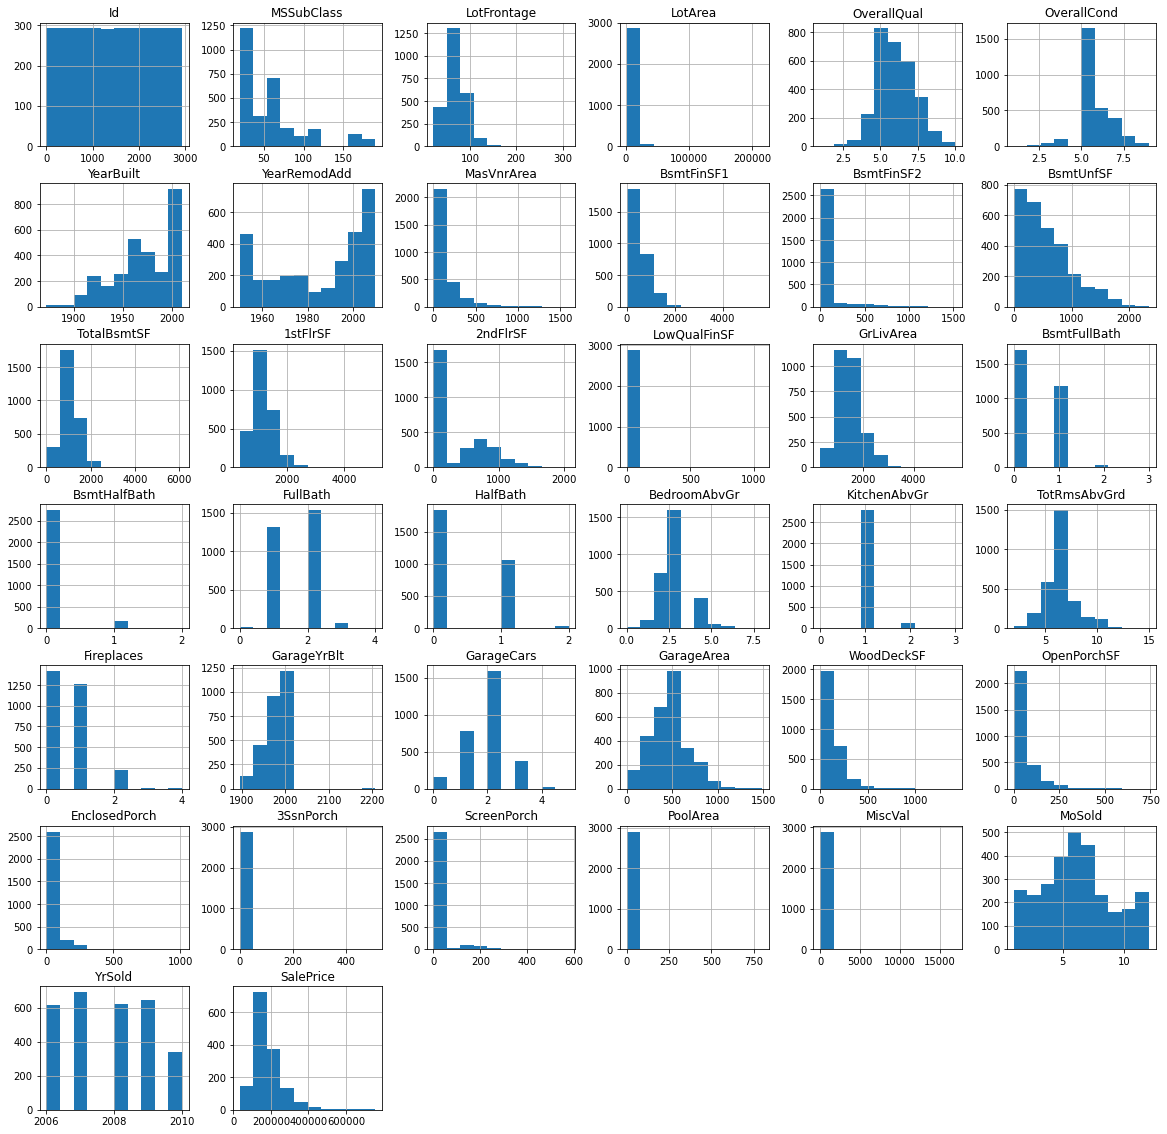

In [3]:
data.hist(figsize=(20,20))
plt.show()

## Plots to assess normality

To visualise the distribution of the variables, we plot a **histogram and a Q-Q plot**. In the **Q-Q pLots**, if the variable is normally distributed, the values of the variable should fall in a **45 degree line** when plotted against the theoretical quantiles.

**Plot the histograms by a function to have a quick look at the variable distribution! Histogram and Q-Q plots!**

In [4]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

### Original distribution

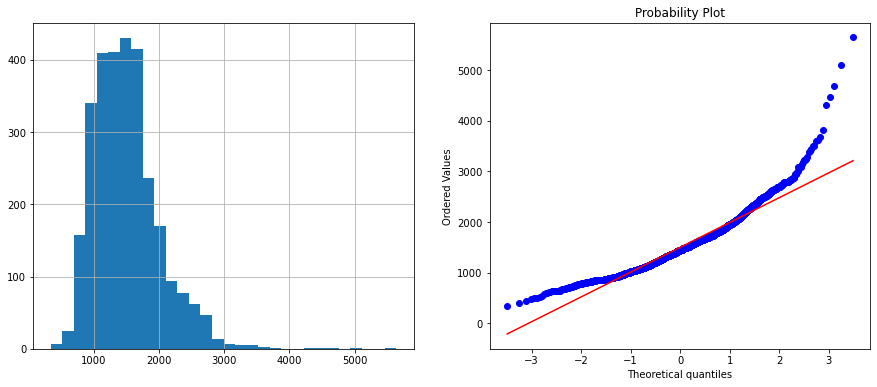

In [5]:
diagnostic_plots(data, 'GrLivArea')

We can see in the plots that the variable is **not normally distributed**. **The values depart from the red line** towards the ends of the distribution and we can see in the histogram that it is **skewed to the right.**

### Logarithmic transformation

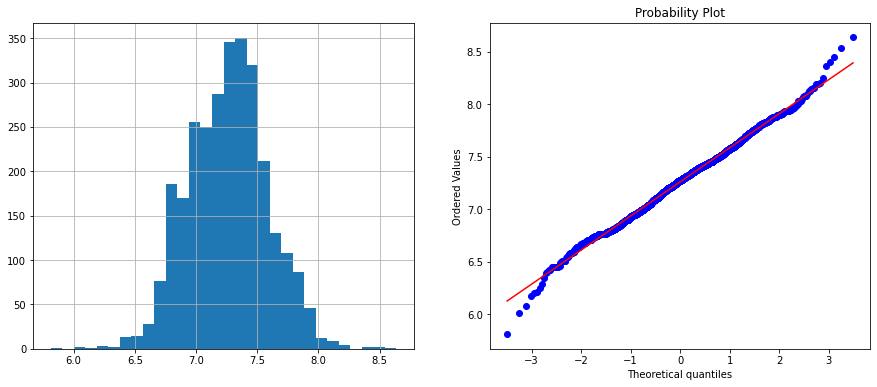

In [6]:
data['GrLivArea_log'] = np.log(data['GrLivArea'])
diagnostic_plots(data, 'GrLivArea_log')

The logarithmic transformation returned a **more Gaussian** for this variable.

### Reciprocal transformation

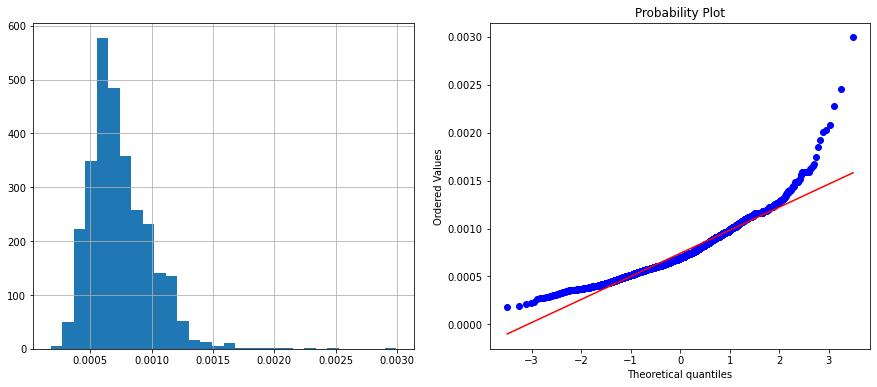

In [7]:
data['GrLivArea_reciprocal'] = 1 / (data['GrLivArea']) 
diagnostic_plots(data, 'GrLivArea_reciprocal')  # np.reciprocal(data['GrLivArea'])

The **reciprocal transformation was not useful** to transform this variable.

### Square root transformation

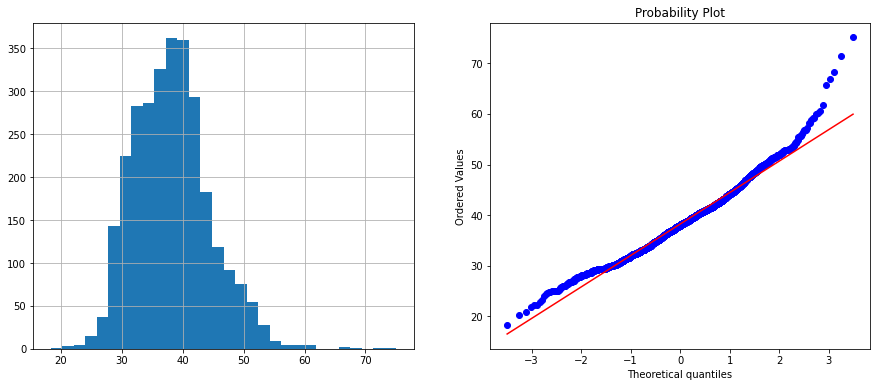

In [8]:
data['GrLivArea_sqr'] = data['GrLivArea']**(1/2) 
diagnostic_plots(data, 'GrLivArea_sqr')  # np.power(data['GrLivArea'], 1/2), np.sqrt(data['GrLivArea'])

**The square root transformation offers a good alternative** to normalise this variable.

### Exponential

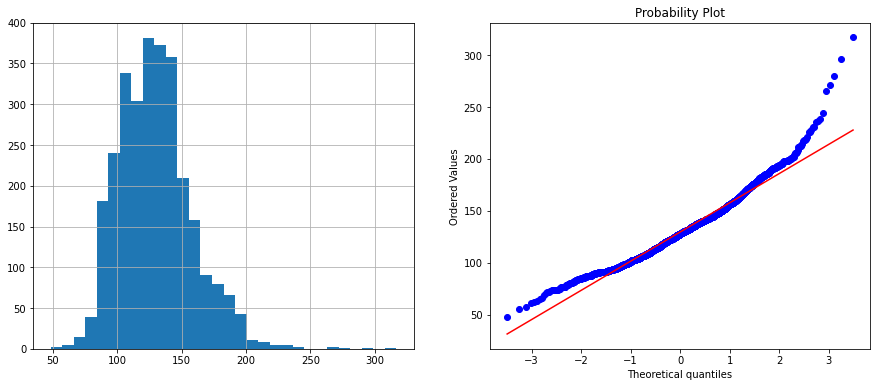

In [9]:
data['GrLivArea_exp'] = data['GrLivArea']**(1/1.5) # you can vary the exponent as needed
diagnostic_plots(data, 'GrLivArea_exp')  # np.power(data['GrLivArea'], any exponent we want)

**The exponential transformation did not work so nicely** for this variable.

### Box-Cox transformation

The **Box-Cox transformation** is defined as: 

T(Y)=(Y exp(λ)−1)/λ if λ!=0, or log(Y) otherwise. 

where Y is the **response variable** and λ is the **transformation parameter**. **λ varies from -5 to 5**. In the transformation, all values of λ  are considered and **the optimal value** for a given variable is **selected.**

Briefly, for each  **λ (the transformation tests several λs)**, the **correlation coefficient of the Probability Plot** (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated (this optimisation equation actually varies with the implementation). 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the **best λ** with the **stats.boxcox function** from the package scipy.

Optimal λ:  -0.011741655231629719


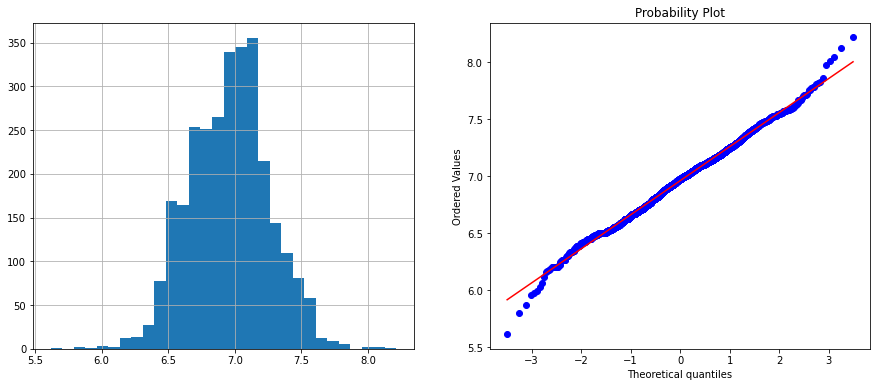

In [10]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['GrLivArea']) 
print('Optimal λ: ', param)
diagnostic_plots(data, 'GrLivArea_boxcox')

### Yeo-Johnson

Yeo-Johnson is the **same as Box-Cox for the positive values of the variable**, but it has **different equations for the negative values** of the variable as described [here](https://www.stat.umn.edu/arc/yjpower.pdf)

Again, **the function searches over a bunch of λ** and selects the one that returns the **best fit to a normal distribution**. 

**To avoid a NumPy error**

In [11]:
data['GrLivArea'] = data['GrLivArea'].astype('float')

2022-02-02 04:39:40,079 [27112] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))

2022-02-02 04:39:40,086 [27112] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2621: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom

2022-02-02 04:39:40,086 [27112] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)

2022-02-02 04:39:40,086 [27112] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx -

Optimal λ:  -8.16922204235409


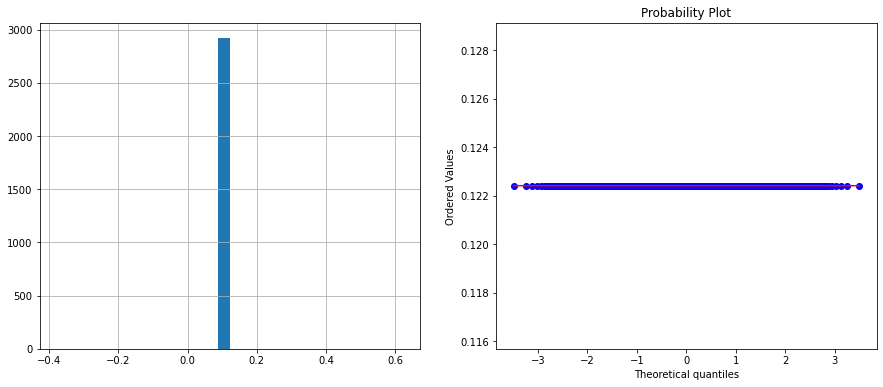

In [12]:
data['GrLivArea_yeojohnson'], param = stats.yeojohnson(data['GrLivArea']) 
print('Optimal λ: ', param)
diagnostic_plots(data, 'GrLivArea_yeojohnson')

We can see that **after the transformation, the quantiles** are somewhat **more aligned over the 45 degree line** with the theoreical quantiles of the Gaussian distribution.